# Student Profile Analysis to identify potential accomodation location
## Introduction/ Business problem: 

The main objective of the project is to find the best accommodation for students of Bangalore/ Hyderabad by classifying the accommodation for incoming students based on their preferences such as proximity to locations, amenities, budget, etc. For fulfilling this objective, we have made use of K-Means clustering algorithm.

Essentially the problem statement looks something like: 

"How can one identify trends in an individual's(student) daily routine and leverage them"

Importing all the required packages for data cleaning, analysis, visualisation

In [2]:
import requests
import pandas as pd
import numpy as np
import random
import geopandas as gpd
import matplotlib.cm as cm
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
print("All packages imported!")

All packages imported!


In [3]:
dfstudents=pd.read_csv('food_coded.csv')


In [4]:
dfstudents

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


In [3]:
dfclean=dfstudents[['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']]
dfclean.dropna(axis=0,inplace=True)
dfclean.head()

C:\Users\saisa\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


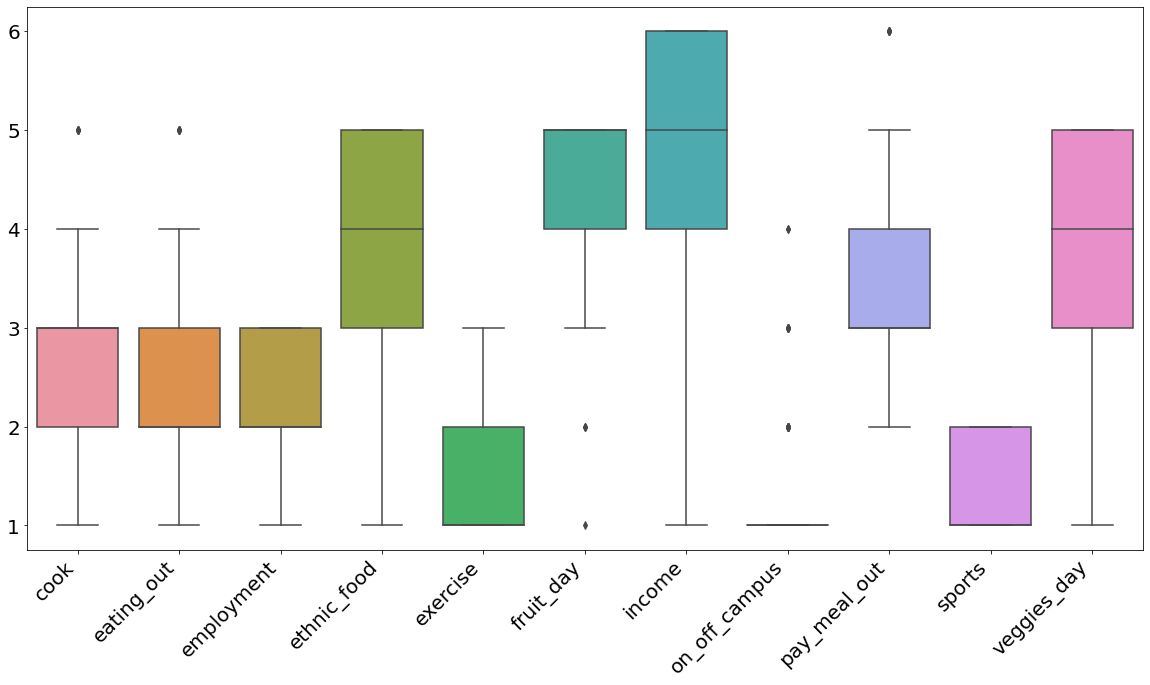

In [4]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = dfclean)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [5]:
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dfclean)
dfclean['Cluster']=kmeans.labels_

C:\Users\saisa\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


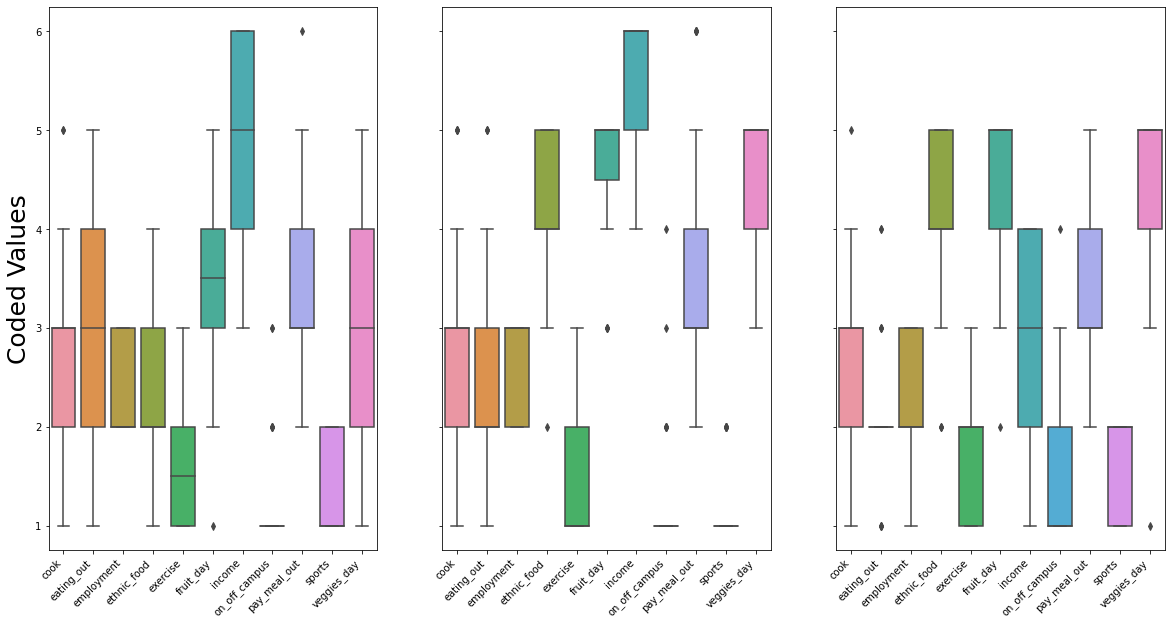

In [6]:
fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)
axes[0].set_ylabel('Coded Values', fontsize=25)

for k in range(kclusters):
    plt.sca(axes[k])
    plt.xticks(rotation=45,ha='right')
    sns.boxplot(data = dfclean[dfclean['Cluster'] == k].drop('Cluster',1), ax=axes[k])
        
plt.show()

In [7]:
search_query = 'Apartment' #Search for residential locations
radius = 18000 #Set the radius to 18 kilometres due to traffic constraints
latitude=13.133521#College location
longitude=77.567135

In [8]:
CLIENT_ID = '5O2OQN1HOFBER5CQ4VJSEBU3PZ54Z3T31EGTNFJ0V04KSKZI'
CLIENT_SECRET = 'H2KIZ3QZRGZD2GVCOSSTL04SQ3N0Y5QWEWQKPQ1VTPQNF24R' 
VERSION = '20180604'
LIMIT = 200

In [10]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [11]:
results = requests.get(url).json()

In [12]:
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

C:\Users\saisa\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood
0,51319d59e4b04a7c6799abe4,GK Lakeview Apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1665818712,False,Ananthapura Road,Yelahanka New Town,13.114882,77.563090,"[{'label': 'display', 'lat': 13.11488202331476...",2120,560064,IN,Bangalore,Karnātaka,India,"[Ananthapura Road (Yelahanka New Town), Bangal...",NaN
1,4db7040e0437fa536a641766,Apartment Banaswadi main road cross hight stre...,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1665818712,False,Banaswadi Main Rd,hight street,13.000170,77.624545,"[{'label': 'display', 'lat': 13.00017043034296...",16096,NaN,IN,Bangalore,Karnātaka,India,"[Banaswadi Main Rd (hight street), Bangalore, ...",NaN
2,56133261498e95c619c830f8,Dwellington Apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1665818712,False,NaN,NaN,13.039492,77.555590,"[{'label': 'display', 'lat': 13.03949179789228...",10541,NaN,IN,Bangalore,Karnātaka,India,"[Bangalore, Karnātaka, India]",NaN
3,56ac9283498e7cbb284553da,Shriram Suhaana Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1665818712,False,NaN,NaN,13.134563,77.572646,"[{'label': 'display', 'lat': 13.13456280998398...",608,NaN,IN,NaN,NaN,India,[India],NaN
4,573a06fc498ed9e519ca0969,"1/747, Rented Apartment","[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1665818712,False,"1/747, 1st Cross, Beside Karvy Building",Krishna Temple Road,12.979005,77.645620,"[{'label': 'display', 'lat': 12.979005, 'lng':...",19191,560038,IN,Bangalore,Karnātaka,India,"[1/747, 1st Cross, Beside Karvy Building (Kris...",NaN


In [13]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered.drop([4,17,18,21,24,30,43],axis=0,inplace=True) #remove some unwanted locations like hotels
dataframe_filtered.drop(['cc','country','state','city','neighborhood'],axis=1,inplace=True) #no need for those columns as we know we're in Bangalore,IN
dataframe_filtered.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,formattedAddress,id
0,GK Lakeview Apartment,Residential Building (Apartment / Condo),Ananthapura Road,Yelahanka New Town,13.114882,77.563090,"[{'label': 'display', 'lat': 13.11488202331476...",2120,560064,"[Ananthapura Road (Yelahanka New Town), Bangal...",51319d59e4b04a7c6799abe4
1,Apartment Banaswadi main road cross hight stre...,Residential Building (Apartment / Condo),Banaswadi Main Rd,hight street,13.000170,77.624545,"[{'label': 'display', 'lat': 13.00017043034296...",16096,NaN,"[Banaswadi Main Rd (hight street), Bangalore, ...",4db7040e0437fa536a641766
2,Dwellington Apartment,Residential Building (Apartment / Condo),NaN,NaN,13.039492,77.555590,"[{'label': 'display', 'lat': 13.03949179789228...",10541,NaN,"[Bangalore, Karnātaka, India]",56133261498e95c619c830f8
3,Shriram Suhaana Apartments,Residential Building (Apartment / Condo),NaN,NaN,13.134563,77.572646,"[{'label': 'display', 'lat': 13.13456280998398...",608,NaN,[India],56ac9283498e7cbb284553da
5,Shree Prakriti Apartment,Residential Building (Apartment / Condo),NaN,NaN,13.064801,77.572098,"[{'label': 'display', 'lat': 13.06480088033049...",7668,NaN,[India],552e828d498efbc5456866e9


In [14]:
#define coordinates of the college
map_bang=folium.Map(location=[12.971599,77.594566],zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()

latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
labels = list(dataframe_filtered.name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_bang)    
    
# add incidents to map
map_bang.add_child(locations)

# add incidents to map
map_bang.add_child(locations)

map_bang

In [15]:
df_evaluate=dataframe_filtered[['lat','lng']]

In [16]:
RestList=[]
latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
for lat, lng in zip(latitudes, longitudes):    
    radius = 5000 #Set the radius to 5 kilometres for convenience
    latitude=lat#Query for the apartment location in question
    longitude=lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'Restaurant' #Search for any food related locations
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe2 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
    dataframe_filtered2 = dataframe2.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
    RestList.append(dataframe_filtered2['categories'].count())

C:\Users\saisa\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [17]:
df_evaluate['Restaurants']=RestList

C:\Users\saisa\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
FruitList=[]
latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
for lat, lng in zip(latitudes, longitudes):    
    radius = 5000 #Set the radius to 5 kilometres for convenience
    latitude=lat#Query for the apartment location in question
    longitude=lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'Fruit' #Search for any food related locations
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe2 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
    dataframe_filtered2 = dataframe2.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
    FruitList.append(dataframe_filtered2['categories'].count())

C:\Users\saisa\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [19]:
df_evaluate['Fruits,Vegetables,Groceries']=FruitList

C:\Users\saisa\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_evaluate)
df_evaluate['Cluster']=kmeans.labels_
df_evaluate['Cluster']=df_evaluate['Cluster'].apply(str)
df_evaluate.head(10)

C:\Users\saisa\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\saisa\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lat,lng,Restaurants,"Fruits,Vegetables,Groceries",Cluster
0,13.114882,77.563090,10,15,0
1,13.000170,77.624545,49,49,2
2,13.039492,77.555590,50,29,1
3,13.134563,77.572646,13,3,0
5,13.064801,77.572098,50,18,1
6,13.069250,77.595719,49,19,1
7,13.063300,77.580675,50,20,1
8,13.061164,77.569535,50,18,1
9,13.059434,77.605790,49,23,1
10,13.065513,77.650394,49,8,1


In [21]:
#define coordinates of the college
map_bang=folium.Map(location=[12.971599,77.594566],zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()
# set color scheme for the clusters
def color_producer(cluster):
    if cluster=='0':
        return 'green'
    elif cluster=='1':
        return 'orange'
    else:
        return 'red'
latitudes = list(df_evaluate.lat)
longitudes = list(df_evaluate.lng)
labels = list(df_evaluate.Cluster)
names=list(dataframe_filtered.name)
for lat, lng, label,names in zip(latitudes, longitudes, labels,names):
    folium.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=1,
            popup=folium.Popup(names, max_width = 300),
            radius=5,
            color=color_producer(label)
        ).add_to(map_bang)

# add locations to map
map_bang.add_child(locations)

map_bang

Applying K-Means, we find 3 prominent clusters:

Cluster 0(Green) Where both (fruits and vegetables) and (restaurants) are abundant

Cluster 1(Yellow): Restaurants are plentiful, but groceries less so.

Cluster 2(Red): Restaurants and groceries are relatively hard to find.

Now, one can easily predict where which kind of student will prefer to stay!